# Description

This work is devoted to acquaintance with neural networks and their use in regression problems.

In [1]:
import torch
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Tasks

Task 1. Create a neural network that predicts the function sin(y).

__Data preparation__

Text(0.5, 1.0, 'y = sin(x)')

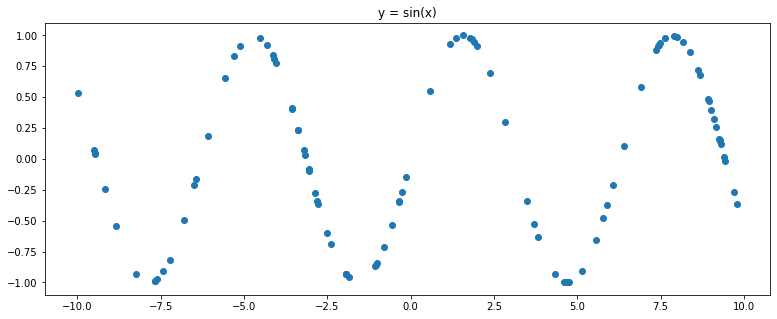

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('y = sin(x)')

Text(0.5, 1.0, 'Gaussian noise')

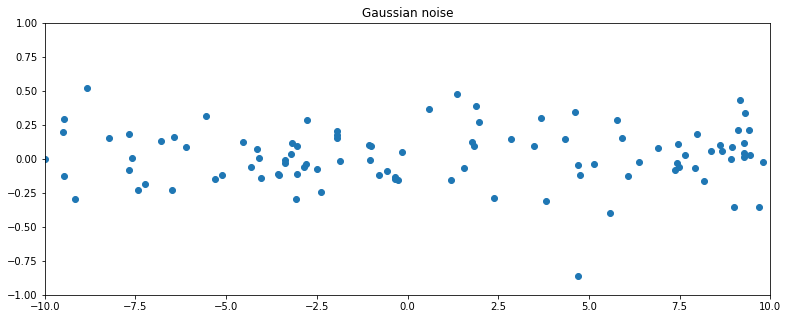

In [4]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

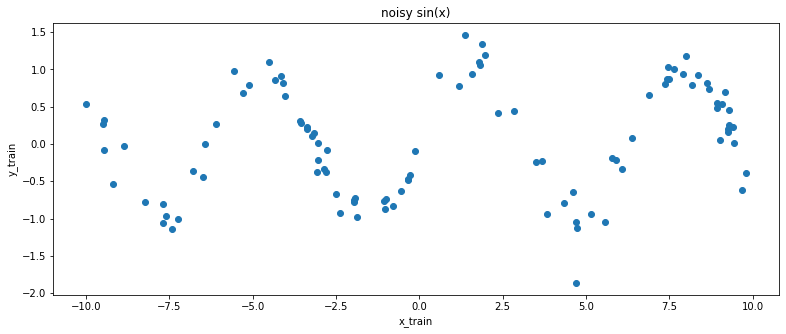

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
print('Shape x train: ', x_train.shape)
print('Shape y train: ', y_train.shape)

Shape x train:  torch.Size([100, 1])
Shape y train:  torch.Size([100, 1])


Text(0, 0.5, 'y_val')

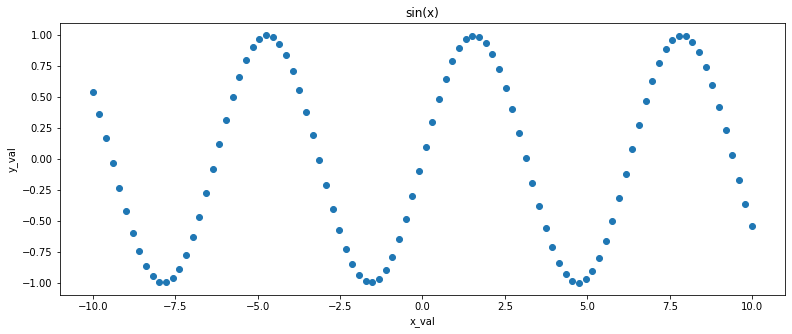

In [7]:
x_val = torch.linspace(-10, 10, 100)
y_val = torch.sin(x_val.data)
plt.plot(x_val.numpy(), y_val.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_val')
plt.ylabel('y_val')

In [8]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1);

__Model__

In [9]:
class SineNet(torch.nn.Module):
    
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [10]:
sine_net = SineNet(50)
sine_net

SineNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)

__Optimizer__

In [11]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

__Loss__

In [12]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

__Model training__

In [13]:
loss_history = []

for epoch in range(1000): 
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    loss_history.append(loss_val)
    
    optimizer.step()

__Prediction__

In [14]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')

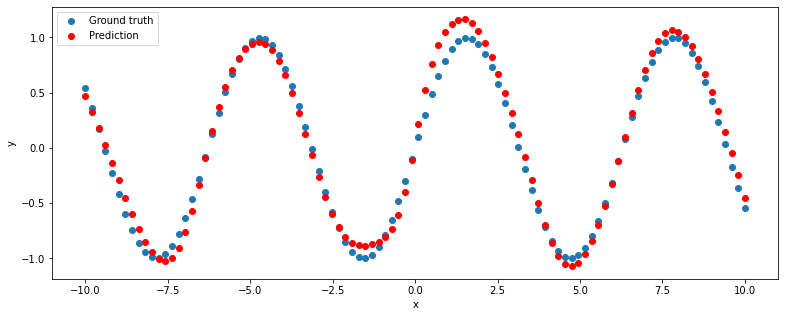

In [15]:
predict(sine_net, x_val, y_val)

Text(0, 0.5, 'Loss')

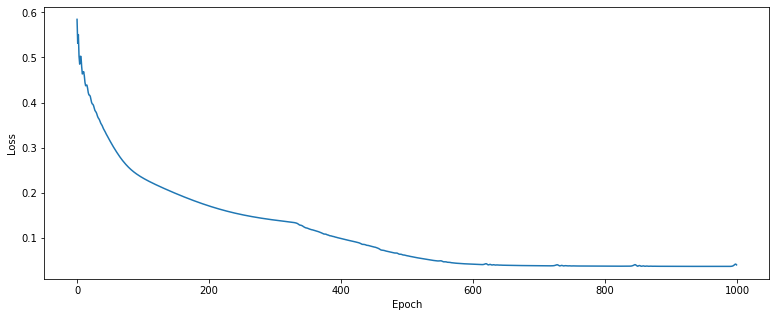

In [16]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Task 2. Solve the regression problem on the example of the dataset [Energy efficiency](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency) from a large UCI library. Predict heating load and cooling load.

__Data preparation__

In [17]:
energy_df = pd.read_excel('data/energy.xlsx')
energy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [18]:
energy_df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [19]:
x = torch.tensor((energy_df.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8']]).values).float()
y = torch.tensor((energy_df.loc[:, ['Y1', 'Y2']]).values).float()
print('x shape: ', x.shape)
print('y shape: ', y.shape)

x shape:  torch.Size([768, 7])
y shape:  torch.Size([768, 2])


In [20]:
x_train, x_test = torch.split(x, split_size_or_sections=(int(len(energy_df)*0.7)), dim=0)
y_train, y_test = torch.split(y, split_size_or_sections=(int(len(energy_df)*0.7)), dim=0)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  torch.Size([537, 7])
y_train shape:  torch.Size([537, 2])


__Model__

In [21]:
class EnergyNet(torch.nn.Module):
    
    def __init__(self, number_of_features, n_hidden_neurons):
        super(EnergyNet, self).__init__()
        self.fc1 = torch.nn.Linear(number_of_features, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, int(n_hidden_neurons*0.5))
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(int(n_hidden_neurons*0.5), 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

In [22]:
energy_net = EnergyNet(x.shape[1], 100)
energy_net

EnergyNet(
  (fc1): Linear(in_features=7, out_features=100, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

__Optimizer__

In [23]:
optimizer = torch.optim.Adam(energy_net.parameters(), lr=0.001)

__Loss__

In [24]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

__Model training__

In [25]:
energy_history = []

for epoch in range(1000): 
    optimizer.zero_grad()
    y_pred = energy_net.forward(x_train)
    
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    energy_history.append(loss_val)
    
    optimizer.step()

__Prediction__

In [26]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(y_train.numpy()[:, 0], y_train.numpy()[:, 1], 'o', label='Ground truth', ms=3)
    plt.plot(y_pred.data.numpy()[:, 0], y_pred.data.numpy()[:, 1], 'o', c='r', label='Prediction', ms=3)
    plt.legend(loc='upper left')
    plt.xlabel('Heating Load')
    plt.ylabel('Cooling Load')

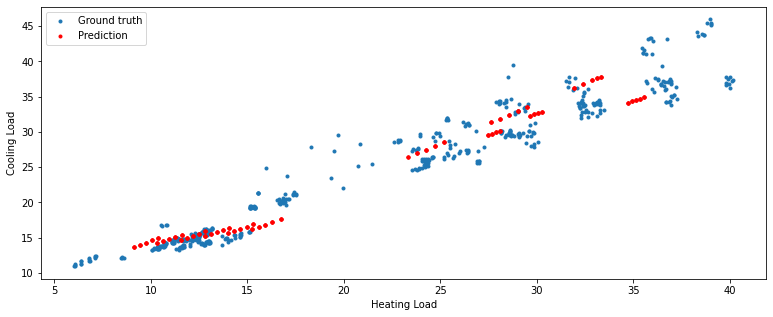

In [27]:
predict(energy_net, x_test, y_test)

Text(0, 0.5, 'Loss')

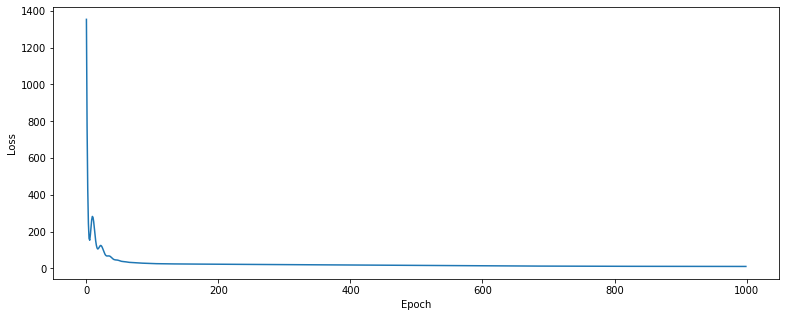

In [28]:
plt.plot(energy_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')